In [3]:
#Librerias
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.ensemble import ExtraTreesClassifier  
from sklearn.metrics import classification_report, confusion_matrix 

In [4]:
#Cargamos los datos y visualizamos
df = pd.read_csv('DS_Prediccion_EnfermedadCardiaca_SinDatosPerdidos.csv',sep=';')
df.head(10)

,Genero,Edad,Educacion,Fumador_actual,Cigarros_por_dia,PAM,ACV_prevalente,HTA_prevalente,Diabetes,Colesterol,PAS,PAD,IMC,FC,Glucosa,Resultado
0,1,46,1,0,0,0,0,0,0,250,121,81,27,95,76,0
1,0,48,0,1,20,0,0,0,0,245,128,80,29,75,70,0
2,1,61,2,1,30,0,0,1,0,225,150,95,25,65,103,1
3,1,46,2,1,23,0,0,0,0,285,130,84,29,85,85,0
4,1,43,1,0,0,0,0,1,0,228,180,110,23,77,99,0
5,1,63,0,0,0,0,0,0,0,205,138,71,30,60,85,1
6,1,45,1,1,20,0,0,0,0,313,100,71,33,79,78,0
7,0,52,0,0,0,0,0,1,0,260,142,89,22,76,79,0
8,0,43,0,1,30,0,0,1,0,225,162,107,26,93,88,0
9,1,50,0,0,0,0,0,0,0,254,133,76,24,75,76,0


In [5]:
df.groupby('Resultado').size()

Resultado
0    3098
1    3098
dtype: int64

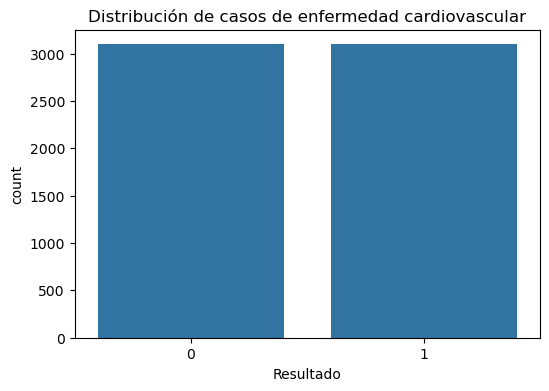

In [9]:
# Gráfico de conteo
plt.figure(figsize=(6,4))
sns.countplot(x='Resultado', data=df)
plt.title('Distribución de casos de enfermedad cardiovascular')
plt.show()

In [11]:
#Separaramos X e Y
X = df.drop('Resultado', axis=1).values
y = df['Resultado'].values

In [13]:
#Normalizamos los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
#Separamos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=30)

In [17]:
#Creamos el modelo ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=500, random_state=50)  # Usamos 500 árboles

In [19]:
#Entrenamos el modelo ExtraTreesClassifier
model.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=500, random_state=50)

In [113]:
# Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Mostramos la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # Aquí usamos y_pred, no predicciones
labels = ["No infarto", "Sí infarto"]
matriz = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Aquí también usamos y_pred
print("\nMatriz de confusión:")
print(pd.DataFrame(matriz, index=labels, columns=labels))

# Mostramos el reporte de clasificación
clasificadores = ["No infarto", "Sí infarto"]  # Esto ya estaba bien
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=clasificadores))


Matriz de confusión:
            No infarto  Sí infarto
No infarto         773         131
Sí infarto          97         858

Reporte de clasificación:
              precision    recall  f1-score   support

  No infarto       0.89      0.86      0.87       904
  Sí infarto       0.87      0.90      0.88       955

    accuracy                           0.88      1859
   macro avg       0.88      0.88      0.88      1859
weighted avg       0.88      0.88      0.88      1859



In [21]:
# Ejemplo de predicción para el modelo de ExtraTreesClassifier
ejemplo = [[1, 68, 2, 0, 0, 0, 0, 1, 0, 310, 182, 121, 26, 85, 65]]
print(ejemplo)
# Normalizamos el ejemplo
ejemplo_scaled = scaler.transform(ejemplo)

# Predicción
print("\nPredicción para el ejemplo con ExtraTreesClassifier:")
prediccion_et = model.predict(ejemplo_scaled)  
print(f"Predicción: {prediccion_et[0]}") 

# Probabilidades
print("Probabilidades de cada clase:")
print(model.predict_proba(ejemplo_scaled))

[[1, 68, 2, 0, 0, 0, 0, 1, 0, 310, 182, 121, 26, 85, 65]]

Predicción para el ejemplo con ExtraTreesClassifier:
Predicción: 1
Probabilidades de cada clase:
[[0.354 0.646]]


✅ El número óptimo de árboles (n_estimators) es: 310
📉 Tasa de error mínima: 0.1205


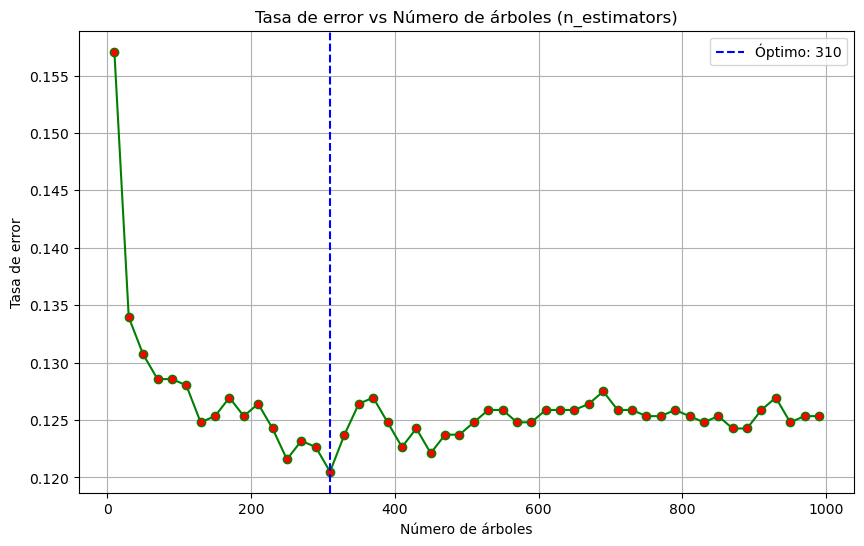

In [118]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Rango de árboles a evaluar
estimadores = range(10, 1000, 20)

# Lista para guardar tasa de error
tasa_error = []

for n in estimadores:
    modelo = ExtraTreesClassifier(n_estimators=n, random_state=50)
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X_test)
    error = np.mean(predicciones != y_test)
    tasa_error.append(error)

# Buscar el número de árboles con menor tasa de error
min_error = min(tasa_error)
optimo_n = estimadores[tasa_error.index(min_error)]

# Mostrar resultado
print(f"✅ El número óptimo de árboles (n_estimators) es: {optimo_n}")
print(f"📉 Tasa de error mínima: {min_error:.4f}")

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(estimadores, tasa_error, color='green', marker='o', markerfacecolor='red', markersize=6)
plt.title("Tasa de error vs Número de árboles (n_estimators)")
plt.xlabel("Número de árboles")
plt.ylabel("Tasa de error")
plt.axvline(optimo_n, color='blue', linestyle='--', label=f'Óptimo: {optimo_n}')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
#Creamos de nuevo el modelo ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=310, random_state=50)  # Usamos 310 árboles
#Entrenamos el modelo ExtraTreesClassifier
model.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=310, random_state=50)

In [25]:
# Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Mostramos la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # Aquí usamos y_pred, no predicciones
labels = ["No infarto", "Sí infarto"]
matriz = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Aquí también usamos y_pred
print("\nMatriz de confusión:")
print(pd.DataFrame(matriz, index=labels, columns=labels))

# Mostramos el reporte de clasificación
clasificadores = ["No infarto", "Sí infarto"]  # Esto ya estaba bien
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=clasificadores))


Matriz de confusión:
            No infarto  Sí infarto
No infarto         779         125
Sí infarto          99         856

Reporte de clasificación:
              precision    recall  f1-score   support

  No infarto       0.89      0.86      0.87       904
  Sí infarto       0.87      0.90      0.88       955

    accuracy                           0.88      1859
   macro avg       0.88      0.88      0.88      1859
weighted avg       0.88      0.88      0.88      1859

